In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
full = cv2.imread("../DATA/sammy.jpg")
full = cv2.cvtColor(full, cv2.COLOR_BGR2RGB)

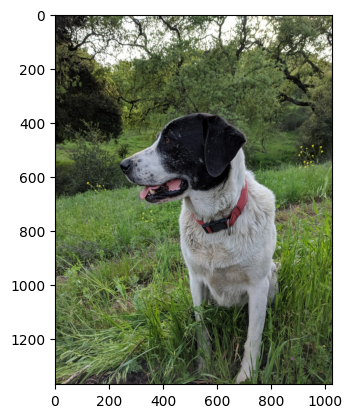

In [6]:
plt.imshow(full)